## Importing all necessary libraries

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras import optimizers
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 

from keras.models import Sequential
from keras.layers import Dense
np.random.seed(7)
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")
print(df.head())


   Sepal length  Sepal width  Petal length  Petal width      Classes
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


## Splitting labels and features

In [3]:
Y = df["Classes"]
X = df.drop(["Classes"],axis = 1)


## Encoding labels for training

In [42]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
encod_y = np_utils.to_categorical(encoded_Y)


## Splitting training and validation set

In [90]:
train_x, val_x, train_y, val_y = train_test_split(X,encod_y, test_size = 0.4, shuffle = True)

In [91]:
print("train_x shape = ", train_x.shape, "train_y shape = ", train_y.shape)
print("val_x shape = ", val_x.shape, "val_y shape = ", val_y.shape)

train_x shape =  (90, 4) train_y shape =  (90, 3)
val_x shape =  (60, 4) val_y shape =  (60, 3)


## Function for adding diffferent layers with different hidden units 

In [162]:
def model_train(layers,h1, h_values, learning_rate = 0.001, epochs = 1000, batch_size = 10):
    model = Sequential()
    model.add(Dense(h1, input_dim = 4, activation="relu"))
    
    for i in range(0,layers-2):
        model.add(Dense(h_values[i], activation="relu"))
        
    model.add(Dense(3, activation="sigmoid"))
    model.summary()
    adam = optimizers.Adam(lr = learning_rate)
    model.compile(loss = "categorical_crossentropy", optimizer = adam, metrics= ["accuracy"])
    model_fit = model.fit(train_x, train_y, epochs = epochs, batch_size= batch_size, verbose= 0, validation_data= (val_x, val_y))
    
    return model_fit

## Plotting graphs

In [183]:
def plot_show(trained_model):
    hist_dict = trained_model.history

    loss = hist_dict["loss"][300:]
    val_loss = hist_dict["val_loss"][300:]

    epochs = [i  for i in range(0,len(loss))]
    plt.plot(epochs, loss, label = "loss")
    plt.plot(epochs, val_loss, label =  "val_loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


In [187]:
trained_model__4layer = model_train(4, 20, [15,8])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 20)                100       
_________________________________________________________________
dense_102 (Dense)            (None, 15)                315       
_________________________________________________________________
dense_103 (Dense)            (None, 8)                 128       
_________________________________________________________________
dense_104 (Dense)            (None, 3)                 27        
Total params: 570
Trainable params: 570
Non-trainable params: 0
_________________________________________________________________


In [188]:
trained_model_3layer = model_train(3, 12, [8])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 12)                60        
_________________________________________________________________
dense_106 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_107 (Dense)            (None, 3)                 27        
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


# Trying different combination

## First take different combinations of number of layers

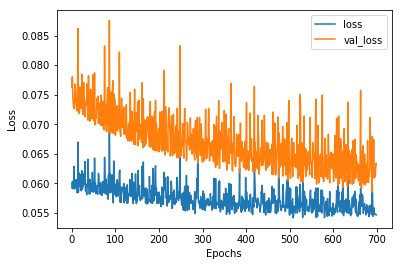

In [189]:
plot_show(trained_model_3layer)

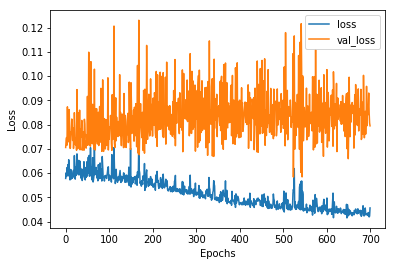

In [190]:
plot_show(trained_model__4layer)

### As we can see taking 3 layers is more benificial.

## Now lets change number of units in first model with 3 layers

In [191]:
model3_with_more_units = model_train(3, 20, [12])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 20)                100       
_________________________________________________________________
dense_109 (Dense)            (None, 12)                252       
_________________________________________________________________
dense_110 (Dense)            (None, 3)                 39        
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


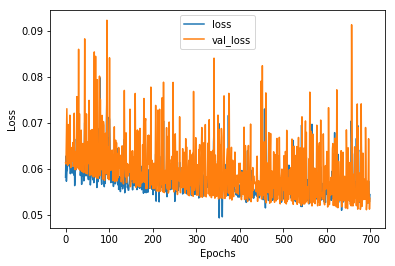

In [192]:
plot_show(model3_with_more_units)

In [193]:
model4_with_more_units = model_train(4, 25, [20,10])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 25)                125       
_________________________________________________________________
dense_112 (Dense)            (None, 20)                520       
_________________________________________________________________
dense_113 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_114 (Dense)            (None, 3)                 33        
Total params: 888
Trainable params: 888
Non-trainable params: 0
_________________________________________________________________


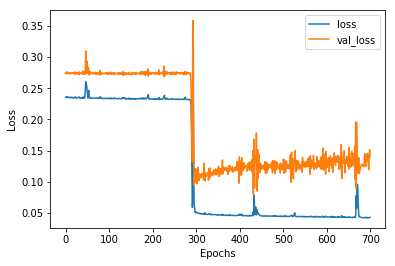

In [199]:
plot_show(model4_with_more_units)

### As we can see in the above plot that by increasing in number of units variance also increased and cause the case of overfitting.

## Let's check out what happen when we change number of epochs in 4 layer neural network.
### By default we took 1000 epochs

In [200]:
trained_model__4layer = model_train(4, 20, [15,8], epochs= 800)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 20)                100       
_________________________________________________________________
dense_124 (Dense)            (None, 15)                315       
_________________________________________________________________
dense_125 (Dense)            (None, 8)                 128       
_________________________________________________________________
dense_126 (Dense)            (None, 3)                 27        
Total params: 570
Trainable params: 570
Non-trainable params: 0
_________________________________________________________________


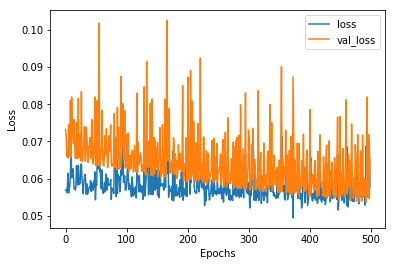

In [201]:
plot_show(trained_model__4layer)

In [202]:
trained_model__4layer = model_train(4, 20, [15,8], epochs= 500)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 20)                100       
_________________________________________________________________
dense_128 (Dense)            (None, 15)                315       
_________________________________________________________________
dense_129 (Dense)            (None, 8)                 128       
_________________________________________________________________
dense_130 (Dense)            (None, 3)                 27        
Total params: 570
Trainable params: 570
Non-trainable params: 0
_________________________________________________________________


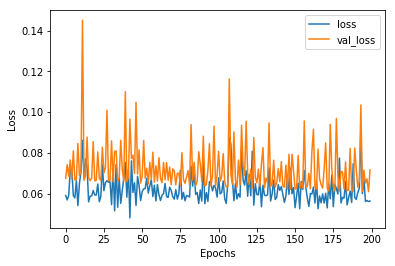

In [203]:
plot_show(trained_model__4layer)

## Let's check out what happen when we tune learning rate
### By default we took learning rate as 0.001

In [204]:
four_layer_train_model = model_train(4, 20, [15,8], epochs= 500, learning_rate= 0.1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_131 (Dense)            (None, 20)                100       
_________________________________________________________________
dense_132 (Dense)            (None, 15)                315       
_________________________________________________________________
dense_133 (Dense)            (None, 8)                 128       
_________________________________________________________________
dense_134 (Dense)            (None, 3)                 27        
Total params: 570
Trainable params: 570
Non-trainable params: 0
_________________________________________________________________


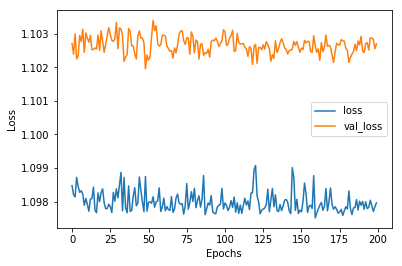

In [205]:
plot_show(four_layer_train_model)

In [206]:
four_layer_train_model = model_train(4, 20, [15,8], epochs= 500, learning_rate= 0.01)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 20)                100       
_________________________________________________________________
dense_136 (Dense)            (None, 15)                315       
_________________________________________________________________
dense_137 (Dense)            (None, 8)                 128       
_________________________________________________________________
dense_138 (Dense)            (None, 3)                 27        
Total params: 570
Trainable params: 570
Non-trainable params: 0
_________________________________________________________________


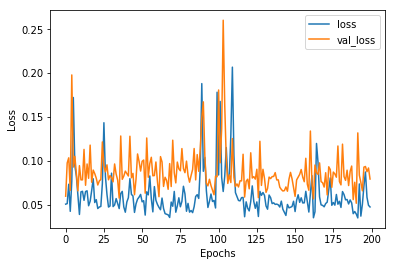

In [207]:
plot_show(four_layer_train_model)

In [208]:
four_layer_train_model = model_train(4, 20, [15,8], epochs= 500, learning_rate= 0.0001)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 20)                100       
_________________________________________________________________
dense_140 (Dense)            (None, 15)                315       
_________________________________________________________________
dense_141 (Dense)            (None, 8)                 128       
_________________________________________________________________
dense_142 (Dense)            (None, 3)                 27        
Total params: 570
Trainable params: 570
Non-trainable params: 0
_________________________________________________________________


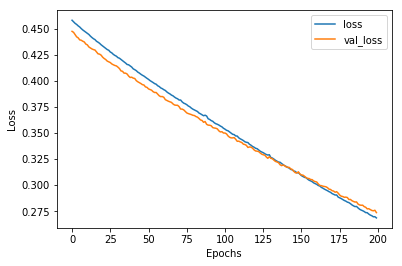

In [209]:
plot_show(four_layer_train_model)